In [1]:
# Импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
sns.set_style("whitegrid")

%matplotlib inline

SEED = 42

import sklearn
# from sklearn import metrics #метрики
# from sklearn import model_selection #методы разделения и валидации
# from sklearn import linear_model #линейные модели
# from sklearn import tree #деревья решений

# from scipy import stats
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_validate
# from sklearn.pipeline import Pipeline

import sympy

from sympy import (
    Symbol, 
    S,
    simplify, 
    latex,
    sin,
    cos,
    exp,
    log,
    sqrt,
    FiniteSet,
    Union,
    Interval,
    Contains,
    ConditionSet,
    Eq,
    solveset, solve,
    diff,
    limit,
    im,
    N,
    oo
)

from sympy.calculus.util import (
    function_range,
    continuous_domain
)

import scipy

from scipy.optimize import minimize, least_squares

from IPython.display import display, Markdown

import sys
import os
from pathlib import Path

# Определяем путь к директории ноутбука
# Простое решение: определяем папку, где находится файл ноутбука
notebook_dir = None

# Способ 1: Используем библиотеку ipynbname (самый надежный способ)
# Если библиотека не установлена, она будет установлена автоматически
try:
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except ImportError:
    # Устанавливаем библиотеку, если её нет
    import subprocess
    import sys
    print("📦 Устанавливаю библиотеку ipynbname для определения пути к ноутбуку...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "ipynbname", "-q"])
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except Exception as e:
    print(f"⚠️  Не удалось использовать ipynbname: {e}")

# Способ 2: Пробуем получить путь через IPython (запасной вариант)
if notebook_dir is None:
    try:
        from IPython import get_ipython
        ipython = get_ipython()
        if ipython is not None:
            if hasattr(ipython, 'start_dir'):
                notebook_dir = str(Path(ipython.start_dir).resolve())
    except:
        pass

# Способ 3: Если не удалось определить, выводим ошибку
if notebook_dir is None:
    print(f"❌ ОШИБКА: Не удалось определить папку ноутбука!")
    print(f"   Текущая рабочая директория: {os.getcwd()}")
    print(f"   Установите библиотеку: pip install ipynbname")
    raise RuntimeError("Не удалось определить директорию ноутбука. Установите: pip install ipynbname")

# Выводим информацию для диагностики
print(f"📂 Директория ноутбука: {notebook_dir}")
print(f"📂 Текущая рабочая директория (до chdir): {os.getcwd()}")

# Добавляем путь к директории ноутбука в sys.path (в начало для приоритета)
if notebook_dir not in sys.path:
    sys.path.insert(0, notebook_dir)

# Меняем рабочую директорию на директорию ноутбука, чтобы относительные пути работали
os.chdir(notebook_dir)
print(f"📂 Рабочая директория установлена: {os.getcwd()}")

# Импортируем helper (если существует)
try:
    from helper.functionanalyzer import FunctionAnalyzer
except ImportError:
    print("⚠️  Модуль helper.functionanalyzer не найден (это нормально, если он не используется)")


from tqdm import tqdm
import time

print(f'Numpy version {np.__version__}')
print(f'Pandas version {pd.__version__}')
print(f'sklearn version {sklearn.__version__}')
print(f'scipy version {scipy.__version__}')
print(f'sympy version {sympy.__version__}')

from sklearnex import patch_sklearn, config_context
patch_sklearn()

import cupy as cp

# Пробуем импортировать nvmath независимо от версии Python
# (модуль может быть обновлен и поддерживать более новые версии)
try:
    import nvmath
    print(f"✅ Модуль nvmath успешно импортирован (Python {sys.version_info.major}.{sys.version_info.minor})")
except ImportError as e:
    # Проверяем, связана ли ошибка с версией Python
    if sys.version_info >= (3, 13):
        print(f"⚠️  Модуль nvmath не установлен или не поддерживает Python {sys.version_info.major}.{sys.version_info.minor}")
        print(f"   Попробуйте обновить nvmath: pip install --upgrade nvmath")
        print(f"   Или используйте Python 3.12 или ниже для полной совместимости")
    else:
        print(f"⚠️  Модуль nvmath не установлен (Python {sys.version_info.major}.{sys.version_info.minor})")
        print(f"   Установите: pip install nvmath")
except Exception as e:
    print(f"⚠️  Ошибка при импорте nvmath: {e}")



📂 Директория ноутбука: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 6\MATH&ML-11. Кластеризация и техники понижения размерности. Часть II
📂 Текущая рабочая директория (до chdir): c:\Users\stepu\OneDrive\IDE
📂 Рабочая директория установлена: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 6\MATH&ML-11. Кластеризация и техники понижения размерности. Часть II
Numpy version 1.26.4
Pandas version 2.2.3
sklearn version 1.5.2
scipy version 1.15.1
sympy version 1.13.3


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


⚠️  Модуль nvmath не установлен или не поддерживает Python 3.13
   Попробуйте обновить nvmath: pip install --upgrade nvmath
   Или используйте Python 3.12 или ниже для полной совместимости


In [2]:
# настройка логгирования

%pip install loguru

from loguru import logger
from helper.logging_config import setup_logging
import logging

# Вызываем настройку в самом начале работы приложения
setup_logging()

# Уменьшаем уровень логирования для sklearn и sklearnex, чтобы убрать лишние INFO сообщения
logging.getLogger('sklearn').setLevel(logging.WARNING)
logging.getLogger('sklearnex').setLevel(logging.WARNING)
logging.getLogger('sklearn.utils.validation').setLevel(logging.WARNING)
logging.getLogger('sklearn.cluster').setLevel(logging.WARNING)

#user_id = 123
#status = "success"
# Привычный и читаемый синтаксис
#logger.info("Аутентификация для пользователя {id} прошла со статусом: {status}", id=user_id, status=status)

# @logger.catch
# def main_logic():
#     logger.info("Приложение начинает работу.")
#     # ... ваш основной код ...
#     a = 10
#     b = 0
#     result = a / b # Это вызовет ошибку, которую поймает @logger.catch

@logger.catch
def main_logic():
    logger.info("Приложение начинает работу.")
    
if __name__ == "__main__":
    main_logic()



22:40:11 | INFO     | helper.logging_config:setup_logging - Стандартный logging перехвачен.
22:40:11 | INFO     | helper.logging_config:setup_logging - Конфигурация логирования завершена.
22:40:11 | INFO     | __main__:main_logic - Приложение начинает работу.


Note: you may need to restart the kernel to use updated packages.


# 4. Меры качества кластеризации. Практика

Мы будем использовать [данные](https://drive.google.com/file/d/1kMCjfP8nmRIv0gOY9IHciInGxNAwzSmj/view?usp=sharing), взятые с датчиков акселерометров и гироскопов смартфонов Samsung Galaxy S3. Телефоны носили в кармане добровольцы в возрасте от 19 до 49 лет. Смартфоны постоянно фиксировали значения ускорения и скорости по трём измерениям, а поведение людей записывали на видео, чтобы вручную отметить, какую физическую активность осуществлял человек в тот или иной момент.

Данные содержат следующие признаки:

различные показатели с акселерометра и гироскопа;
метка активности (физическая активность человека в конкретный момент).

Попробуем на основе данных с гироскопа и акселерометра разделить активности людей на некоторые схожие по своим характеристикам группы. В идеале наблюдения во время ходьбы должны попасть в один кластер, наблюдения во время подъёма по лестнице — в другой и т. д.

## Задание 4.1
2 points possible (graded)

Так как изначально данные были представлены для решения задачи классификации, то они находятся в разных файлах (обучающая и тестовая выборки в соотношении 70/30). Соедините признаки так, чтобы сначала шла обучающая выборка, а затем — тестовая, и отдельно соедините значения целевых переменных (разумеется, в том же порядке).

Файлы расположены в подпапке /data
test.txt
test_labels.txt
train.txt
train_labels.txt

Какая размерность получилась у набора данных с признаками?

Количество объектов:

 
Количество признаков:

Подсказка (1 из 1): Для начала необходимо считать все предложенные данные, затем объединить признаки (train и test) и после этого объединить значения целевых переменных (train_labels и test_labels).

In [11]:
# Задание 4.1: Загрузка и объединение данных

X_train = np.loadtxt("data/train.txt")
y_train = np.loadtxt("data/train_labels.txt")

X_test = np.loadtxt("data/test.txt")
y_test = np.loadtxt("data/test_labels.txt")

X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# Проверяем размерность
print(f"Размерность набора данных с признаками: {X.shape}")
print(f"Количество объектов: {X.shape[0]}")
print(f"Количество признаков: {X.shape[1]}")
print(f"\nРазмерность целевых переменных: {y.shape}")


Размерность набора данных с признаками: (10299, 561)
Количество объектов: 10299
Количество признаков: 561

Размерность целевых переменных: (10299,)


## Задание 4.2
1 point possible (graded)
Теперь найдите число различных активностей, то есть на сколько кластеров в идеале должны разделиться наблюдения.

Подсказка (1 из 1): Для этого необходимо найти количество всех уникальных значений, которые принимает целевая переменная.

In [12]:
# Задание 4.2: Нахождение числа различных активностей

# Находим уникальные значения меток (классы активностей)
unique_labels = np.unique(y)
n_clusters = len(unique_labels)

print(f"Уникальные метки активностей: {unique_labels}")
print(f"\nЧисло различных активностей (кластеров): {n_clusters}")

# Дополнительная информация: распределение по классам
print(f"\nРаспределение наблюдений по классам:")
for label in unique_labels:
    count = np.sum(y == label)
    percentage = (count / len(y)) * 100
    print(f"  Класс {int(label)}: {count} наблюдений ({percentage:.2f}%)")


Уникальные метки активностей: [1. 2. 3. 4. 5. 6.]

Число различных активностей (кластеров): 6

Распределение наблюдений по классам:
  Класс 1: 1722 наблюдений (16.72%)
  Класс 2: 1544 наблюдений (14.99%)
  Класс 3: 1406 наблюдений (13.65%)
  Класс 4: 1777 наблюдений (17.25%)
  Класс 5: 1906 наблюдений (18.51%)
  Класс 6: 1944 наблюдений (18.88%)


## Пояснение
Как видите, есть ряд активностей, обозначенных цифрами. Эти метки означают следующее:

1 — ходьба;
2 — подъём;
3 — спуск;
4 — сидение;
5 — стояние;
6 — лежание.

## Задание 4.3
1 point possible (graded)
Далее необходимо отмасштабировать признаки. Будем использовать для этого алгоритм StandardScaler. Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта, предварительно округлив его до двух знаков после точки-разделителя.


Подсказка (1 из 1): Необходимо определить алгоритм, который будет использоваться для масштабирования, обучить его на наших признаках и трансформировать их.

In [13]:
# Задание 4.3: Масштабирование признаков с помощью StandardScaler

from sklearn.preprocessing import StandardScaler

# Создаем экземпляр StandardScaler
scaler = StandardScaler()

# Обучаем scaler на данных X (вычисляем среднее и стандартное отклонение)
scaler.fit(X)

# Трансформируем данные X (применяем масштабирование)
X_scaled = scaler.transform(X)

# Находим значение первого признака для первого объекта
first_feature_first_object = X_scaled[0, 0]

# Округляем до двух знаков после запятой
first_feature_first_object_rounded = round(first_feature_first_object, 2)

print(f"Значение первого признака для первого объекта (до округления): {first_feature_first_object}")
print(f"Значение первого признака для первого объекта (округлено до 2 знаков): {first_feature_first_object_rounded}")

# Дополнительная информация для проверки
print(f"\nРазмерность масштабированных данных: {X_scaled.shape}")
print(f"Среднее значение первого признака (должно быть ~0): {X_scaled[:, 0].mean():.6f}")
print(f"Стандартное отклонение первого признака (должно быть ~1): {X_scaled[:, 0].std():.6f}")
print(f"\nПервые 5 значений первого признака (масштабированные): {X_scaled[:5, 0]}")
print(f"Первые 5 значений первого признака (исходные): {X[:5, 0]}")


Значение первого признака для первого объекта (до округления): 0.2105338541767611
Значение первого признака для первого объекта (округлено до 2 знаков): 0.21

Размерность масштабированных данных: (10299, 561)
Среднее значение первого признака (должно быть ~0): 0.000000
Стандартное отклонение первого признака (должно быть ~1): 1.000000

Первые 5 значений первого признака (масштабированные): [0.21053385 0.06020848 0.07845971 0.0713747  0.0337379 ]
Первые 5 значений первого признака (исходные): [0.28858451 0.27841883 0.27965306 0.27917394 0.27662877]


## Задание 4.4
0.0/3.0 points (graded)
Пора переходить к кластеризации. Для начала определите оптимальное количество кластеров, используя внутренние меры кластеризации. Используйте все известные вам коэффициенты, реализуемые в библиотеке sklearn: коэффициент силуэта, индекс Калински — Харабаса и индекс Дэвиса — Болдина. В качестве алгоритма возьмите k-means++, в качестве значения параметра random_state — число 42.

Выведите оптимальное количество кластеров для каждой метрики, перебирая значения от 2 до 9 включительно. Также введите значение каждой метрики, округлённое до двух знаков после точки-разделителя.

- Коэффициент силуэта

Количество кластеров:


Значение:

 
- Индекс Калински — Харабаса

Количество кластеров:

 
Значение:
 
- Индекс Дэвиса — Болдина

Количество кластеров:

  
Значение:


Подсказка (1 из 1): Для выполнения этого задания вам понадобится для каждого индекса пройтись циклом по всем возможным количествам кластеров (от 2 до 9), обучить алгоритм k-means++ и рассчитать для каждого случая значение необходимого индекса.

Вычисление метрик для разных количеств кластеров...



Обработка кластеров:  12%|█▎        | 1/8 [01:36<11:14, 96.37s/кластер]

Кластеров: 2
  Коэффициент силуэта: 0.39
  Индекс Калински-Харабаса: 7880.81
  Индекс Дэвиса-Болдина: 1.07



Обработка кластеров:  25%|██▌       | 2/8 [02:37<07:34, 75.67s/кластер]

Кластеров: 3
  Коэффициент силуэта: 0.32
  Индекс Калински-Харабаса: 5034.48
  Индекс Дэвиса-Болдина: 1.79



Обработка кластеров:  38%|███▊      | 3/8 [04:19<07:18, 87.66s/кластер]

Кластеров: 4
  Коэффициент силуэта: 0.15
  Индекс Калински-Харабаса: 3696.34
  Индекс Дэвиса-Болдина: 2.34



Обработка кластеров:  50%|█████     | 4/8 [06:06<06:21, 95.36s/кластер]

Кластеров: 5
  Коэффициент силуэта: 0.13
  Индекс Калински-Харабаса: 3027.32
  Индекс Дэвиса-Болдина: 2.41



Обработка кластеров:  62%|██████▎   | 5/8 [07:43<04:47, 95.85s/кластер]

Кластеров: 6
  Коэффициент силуэта: 0.11
  Индекс Калински-Харабаса: 2556.54
  Индекс Дэвиса-Болдина: 2.38



Обработка кластеров:  75%|███████▌  | 6/8 [09:39<03:25, 102.79s/кластер]

Кластеров: 7
  Коэффициент силуэта: 0.08
  Индекс Калински-Харабаса: 2217.89
  Индекс Дэвиса-Болдина: 2.68



Обработка кластеров:  88%|████████▊ | 7/8 [12:50<02:11, 131.67s/кластер]

Кластеров: 8
  Коэффициент силуэта: 0.08
  Индекс Калински-Харабаса: 1970.16
  Индекс Дэвиса-Болдина: 2.66



Обработка кластеров: 100%|██████████| 8/8 [14:11<00:00, 106.44s/кластер]

Кластеров: 9
  Коэффициент силуэта: 0.08
  Индекс Калински-Харабаса: 1786.04
  Индекс Дэвиса-Болдина: 2.58

РЕЗУЛЬТАТЫ:

1. Коэффициент силуэта:
   Оптимальное количество кластеров: 2
   Значение (округлено до 2 знаков): 0.39

2. Индекс Калински-Харабаса:
   Оптимальное количество кластеров: 2
   Значение (округлено до 2 знаков): 7880.81

3. Индекс Дэвиса-Болдина:
   Оптимальное количество кластеров: 2
   Значение (округлено до 2 знаков): 1.07


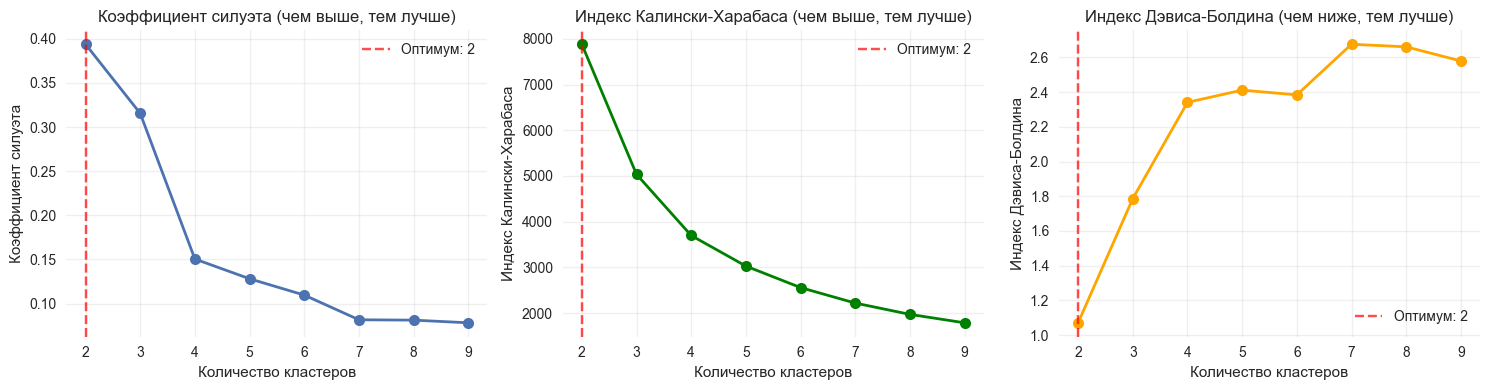

In [14]:
# Задание 4.4: Определение оптимального количества кластеров

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tqdm import tqdm

# Диапазон количества кластеров для перебора
n_clusters_range = range(2, 10)  # от 2 до 9 включительно

# Списки для хранения значений метрик
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

print("Вычисление метрик для разных количеств кластеров...\n")

# Перебираем количество кластеров с прогресс-баром
for n_clusters in tqdm(n_clusters_range, desc="Обработка кластеров", unit="кластер"):
    # Создаем и обучаем KMeans с k-means++ и random_state=42
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    # Вычисляем метрики
    silhouette = silhouette_score(X_scaled, labels)
    calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
    davies_bouldin = davies_bouldin_score(X_scaled, labels)
    
    # Сохраняем значения
    silhouette_scores.append(silhouette)
    calinski_harabasz_scores.append(calinski_harabasz)
    davies_bouldin_scores.append(davies_bouldin)
    
    print(f"Кластеров: {n_clusters}")
    print(f"  Коэффициент силуэта: {silhouette:.2f}")
    print(f"  Индекс Калински-Харабаса: {calinski_harabasz:.2f}")
    print(f"  Индекс Дэвиса-Болдина: {davies_bouldin:.2f}")
    print()

# Находим оптимальные значения
# Коэффициент силуэта: чем выше, тем лучше (максимизация)
best_silhouette_idx = np.argmax(silhouette_scores)
best_silhouette_n_clusters = n_clusters_range[best_silhouette_idx]
best_silhouette_value = silhouette_scores[best_silhouette_idx]

# Индекс Калински-Харабаса: чем выше, тем лучше (максимизация)
best_calinski_harabasz_idx = np.argmax(calinski_harabasz_scores)
best_calinski_harabasz_n_clusters = n_clusters_range[best_calinski_harabasz_idx]
best_calinski_harabasz_value = calinski_harabasz_scores[best_calinski_harabasz_idx]

# Индекс Дэвиса-Болдина: чем ниже, тем лучше (минимизация)
best_davies_bouldin_idx = np.argmin(davies_bouldin_scores)
best_davies_bouldin_n_clusters = n_clusters_range[best_davies_bouldin_idx]
best_davies_bouldin_value = davies_bouldin_scores[best_davies_bouldin_idx]

# Выводим результаты
print("=" * 60)
print("РЕЗУЛЬТАТЫ:")
print("=" * 60)
print(f"\n1. Коэффициент силуэта:")
print(f"   Оптимальное количество кластеров: {best_silhouette_n_clusters}")
print(f"   Значение (округлено до 2 знаков): {round(best_silhouette_value, 2)}")

print(f"\n2. Индекс Калински-Харабаса:")
print(f"   Оптимальное количество кластеров: {best_calinski_harabasz_n_clusters}")
print(f"   Значение (округлено до 2 знаков): {round(best_calinski_harabasz_value, 2)}")

print(f"\n3. Индекс Дэвиса-Болдина:")
print(f"   Оптимальное количество кластеров: {best_davies_bouldin_n_clusters}")
print(f"   Значение (округлено до 2 знаков): {round(best_davies_bouldin_value, 2)}")

# Визуализация результатов
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Коэффициент силуэта
axes[0].plot(list(n_clusters_range), silhouette_scores, marker='o', linewidth=2, markersize=8)
axes[0].axvline(x=best_silhouette_n_clusters, color='r', linestyle='--', alpha=0.7, label=f'Оптимум: {best_silhouette_n_clusters}')
axes[0].set_xlabel('Количество кластеров')
axes[0].set_ylabel('Коэффициент силуэта')
axes[0].set_title('Коэффициент силуэта (чем выше, тем лучше)')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Индекс Калински-Харабаса
axes[1].plot(list(n_clusters_range), calinski_harabasz_scores, marker='o', linewidth=2, markersize=8, color='green')
axes[1].axvline(x=best_calinski_harabasz_n_clusters, color='r', linestyle='--', alpha=0.7, label=f'Оптимум: {best_calinski_harabasz_n_clusters}')
axes[1].set_xlabel('Количество кластеров')
axes[1].set_ylabel('Индекс Калински-Харабаса')
axes[1].set_title('Индекс Калински-Харабаса (чем выше, тем лучше)')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Индекс Дэвиса-Болдина
axes[2].plot(list(n_clusters_range), davies_bouldin_scores, marker='o', linewidth=2, markersize=8, color='orange')
axes[2].axvline(x=best_davies_bouldin_n_clusters, color='r', linestyle='--', alpha=0.7, label=f'Оптимум: {best_davies_bouldin_n_clusters}')
axes[2].set_xlabel('Количество кластеров')
axes[2].set_ylabel('Индекс Дэвиса-Болдина')
axes[2].set_title('Индекс Дэвиса-Болдина (чем ниже, тем лучше)')
axes[2].grid(True, alpha=0.3)
axes[2].legend()

plt.tight_layout()
plt.show()


Возможно, вам покажется удивительным, что все три меры единодушно показали такое расхождение с реальным разделением на кластеры. Однако это совершенно не значит, что они показывают неверные значения или что алгоритмы кластеризации работают некорректно. Возможно, такое разделение на другое количество кластеров можно объяснить — вы сами увидите это позднее.

## Задание 4.5
3 points possible (graded)
Теперь давайте оценим качество кластеризации с точки зрения внешних мер. Реализуйте кластеризацию с помощью классической версии алгоритма k-means. Пусть количество кластеров будет соответствовать количеству активностей. Задайте следующие значения параметров: random_state=42, init='random'.

В качестве ответов введите значения получившихся мер, предварительно округлив их до двух знаков после точки-разделителя.

Однородность:
 
 
Полнота:

 
ARI (скорректированный индекс Рэнда):
 
Подсказка (1 из 1): Для выполнения этого задания необходимо определить алгоритм с указанными в условии параметрами, обучить его на наших масштабированных данных и после этого вычислить необходимые индексы.

In [10]:
# Задание 4.5: Оценка качества кластеризации внешними мерами

from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, adjusted_rand_score
from tqdm import tqdm

# Определяем модель k-means
# Количество кластеров соответствует количеству активностей (6)
model = KMeans(n_clusters=6, init='random', random_state=42)

# Обучаем модель с прогресс-баром
print("Обучаем модель KMeans...")
with tqdm(total=1, desc="Обучение KMeans", bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt}') as pbar:
    model.fit(X_scaled)
    pbar.update(1)

print("\nВычисляем внешние меры качества...\n")

# Вычисляем значение однородности
homogeneity = homogeneity_score(y, model.labels_)
homogeneity_rounded = round(homogeneity, 2)

# Вычисляем значение полноты
completeness = completeness_score(y, model.labels_)
completeness_rounded = round(completeness, 2)

# Вычисляем значение скорректированного индекса Рэнда
ari = adjusted_rand_score(y, model.labels_)
ari_rounded = round(ari, 2)

# Выводим результаты
print("=" * 60)
print("РЕЗУЛЬТАТЫ:")
print("=" * 60)
print(f"\n1. Однородность (Homogeneity):")
print(f"   Значение (округлено до 2 знаков): {homogeneity_rounded}")
print(f"   Значение (точное): {homogeneity}")

print(f"\n2. Полнота (Completeness):")
print(f"   Значение (округлено до 2 знаков): {completeness_rounded}")
print(f"   Значение (точное): {completeness}")

print(f"\n3. ARI (Adjusted Rand Index):")
print(f"   Значение (округлено до 2 знаков): {ari_rounded}")
print(f"   Значение (точное): {ari}")

# Выводим значения как в эталонном коде (для проверки)
print("\n" + "=" * 60)
print("Значения (как в эталонном коде):")
print("=" * 60)
print(homogeneity)
print(completeness)
print(ari)


Обучаем модель KMeans...


Обучение KMeans: 100%|██████████| 1/1


Вычисляем внешние меры качества...

РЕЗУЛЬТАТЫ:

1. Однородность (Homogeneity):
   Значение (округлено до 2 знаков): 0.54
   Значение (точное): 0.5407546666587008

2. Полнота (Completeness):
   Значение (округлено до 2 знаков): 0.58
   Значение (точное): 0.5813838957655822

3. ARI (Adjusted Rand Index):
   Значение (округлено до 2 знаков): 0.42
   Значение (точное): 0.4199537707392207

Значения (как в эталонном коде):
0.5407546666587008
0.5813838957655822
0.4199537707392207


## Задание 4.6
6 points possible (graded)
Выясните, к каким кластерам были преимущественно отнесены различные активности (т. е. в какой кластер попало большинство наблюдений с этой активностью). Нумерацию кластеров начинайте с 1.

Заметьте, что кластеры могут повторяться.

Ходьба:
 
Подъём:
 
Спуск:
 
Сидение:
 
Стояние:

Лежание:
 
Подсказка (1 из 1): Проще всего в данном случае будет составить таблицу сопряжённости (crosstab).

In [24]:
# Задание 4.6

# Создаём таблицу сопряжённости
ct = pd.crosstab(y, model.labels_)

# Определяем название активностей
# Важно: порядок должен соответствовать порядку значений y (1, 2, 3, 4, 5, 6)
ct.index = ['ходьба', 'подъём', 'спуск', 'сидение', 'стояние', 'лежание']

# Нумеруем кластеры с 1
ct.columns = list(range(1, 7))

print("Таблица сопряженности:")
print(ct)
print()

# Находим для каждой активности кластер с максимальным количеством наблюдений
print("Соответствие активностей и кластеров:")
print("=" * 60)

activity_to_cluster = {}
for activity in ct.index:
    # Находим максимальный кластер (уже с нумерацией 1-6 после переименования колонок)
    max_cluster = ct.loc[activity].idxmax()
    max_count = ct.loc[activity, max_cluster]
    activity_to_cluster[activity] = max_cluster
    print(f"{activity.capitalize()}: Кластер {max_cluster} ({max_count} наблюдений)")

print("\n" + "=" * 60)
print("\nОтветы для задания:")
print("=" * 60)
# Выводим в правильном порядке: ходьба, подъём, спуск, сидение, стояние, лежание
for activity in ['ходьба', 'подъём', 'спуск', 'сидение', 'стояние', 'лежание']:
    print(f"{activity.capitalize()}: {activity_to_cluster[activity]}")


Таблица сопряженности:
            1    2     3    4     5    6
ходьба      0   77     0  742   903    0
подъём      0    5     0  295  1242    2
спуск       0  196     0  889   321    0
сидение  1239    0    90    0     1  447
стояние  1346    0     0    0     0  560
лежание    53    0  1557    0     5  329

Соответствие активностей и кластеров:
Ходьба: Кластер 5 (903 наблюдений)
Подъём: Кластер 5 (1242 наблюдений)
Спуск: Кластер 4 (889 наблюдений)
Сидение: Кластер 1 (1239 наблюдений)
Стояние: Кластер 1 (1346 наблюдений)
Лежание: Кластер 3 (1557 наблюдений)


Ответы для задания:
Ходьба: 5
Подъём: 5
Спуск: 4
Сидение: 1
Стояние: 1
Лежание: 3


Правильные ответы из эталона 3, 3, 5, 2, 2, 1

In [25]:
#Задание 4.6

#создаём таблицу сопряжённости
ct = pd.crosstab(y, model.labels_)
#определяем название активностей
ct.index = ['ходьба', 'подъём', 
            'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,7))
display(ct)

,1,2,3,4,5,6
ходьба,0,77,0,742,903,0
подъём,0,5,0,295,1242,2
спуск,0,196,0,889,321,0
сидение,1239,0,90,0,1,447
стояние,1346,0,0,0,0,560
лежание,53,0,1557,0,5,329


## Задание 4.7
0.0/1.0 point (graded)
Теперь попробуйте реализовать алгоритм k-means для двух кластеров (для того числа активностей, которое является оптимальным с точки зрения внутренних мер) и снова посмотреть, как алгоритм разобьёт активности по кластерам. Как и в предыдущем задании, нумерацию кластеров начинайте с 1.


Ходьба:
 
Подъём:
 
Спуск:
 
Сидение:
 
Стояние:

Лежание:

In [26]:
# Задание 4.7: Кластеризация для оптимального количества кластеров (2)

from sklearn.cluster import KMeans
from tqdm import tqdm

# Оптимальное количество кластеров по внутренним мерам (из задания 4.4) = 2
# Обучаем KMeans с k-means++ и random_state=42 (как в задании 4.4)
print("Обучаем KMeans с 2 кластерами...")
model_2clusters = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init=10)

with tqdm(total=1, desc="Обучение KMeans", bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt}') as pbar:
    model_2clusters.fit(X_scaled)
    pbar.update(1)

print("\nСоздаём таблицу сопряжённости...\n")

# Создаём таблицу сопряжённости
ct = pd.crosstab(y, model_2clusters.labels_)

# Определяем название активностей
ct.index = ['ходьба', 'подъём', 'спуск', 'сидение', 'стояние', 'лежание']

# Нумеруем кластеры с 1
ct.columns = list(range(1, 3))  # 2 кластера: 1 и 2

print("Таблица сопряженности:")
print(ct)
print()

# Находим для каждой активности кластер с максимальным количеством наблюдений
print("Соответствие активностей и кластеров:")
print("=" * 60)

activity_to_cluster = {}
for activity in ct.index:
    # Находим максимальный кластер (уже с нумерацией 1-2 после переименования колонок)
    max_cluster = ct.loc[activity].idxmax()
    max_count = ct.loc[activity, max_cluster]
    activity_to_cluster[activity] = max_cluster
    print(f"{activity.capitalize()}: Кластер {max_cluster} ({max_count} наблюдений)")

print("\n" + "=" * 60)
print("\nОтветы для задания:")
print("=" * 60)
# Выводим в правильном порядке: ходьба, подъём, спуск, сидение, стояние, лежание
for activity in ['ходьба', 'подъём', 'спуск', 'сидение', 'стояние', 'лежание']:
    print(f"{activity.capitalize()}: {activity_to_cluster[activity]}")


Обучаем KMeans с 2 кластерами...


Обучение KMeans: 100%|██████████| 1/1


Создаём таблицу сопряжённости...

Таблица сопряженности:
            1     2
ходьба   1722     0
подъём   1536     8
спуск    1406     0
сидение     3  1774
стояние     0  1906
лежание    12  1932

Соответствие активностей и кластеров:
Ходьба: Кластер 1 (1722 наблюдений)
Подъём: Кластер 1 (1536 наблюдений)
Спуск: Кластер 1 (1406 наблюдений)
Сидение: Кластер 2 (1774 наблюдений)
Стояние: Кластер 2 (1906 наблюдений)
Лежание: Кластер 2 (1932 наблюдений)


Ответы для задания:
Ходьба: 1
Подъём: 1
Спуск: 1
Сидение: 2
Стояние: 2
Лежание: 2


Теперь вы видите, что разбиение на два кластера, которое нам навязчиво предлагали внутренние меры, вполне разумно, так как отражает два принципиально разных класса активностей: неподвижные и подвижные.

## Задание 4.8
1 point possible (graded)
Вычислите значение полноты для разбиения на два кластера алгоритмом k-means. Ответ округлите до двух знаков после точки-разделителя.

In [27]:
# Задание 4.8: Вычисление полноты для разбиения на 2 кластера

from sklearn.metrics import completeness_score

# Вычисляем значение полноты для модели с 2 кластерами (из задания 4.7)
completeness = completeness_score(y, model_2clusters.labels_)

# Округляем до двух знаков после запятой
completeness_rounded = round(completeness, 2)

print("=" * 60)
print("РЕЗУЛЬТАТЫ:")
print("=" * 60)
print(f"\nПолнота (Completeness) для 2 кластеров:")
print(f"   Значение (округлено до 2 знаков): {completeness_rounded}")
print(f"   Значение (точное): {completeness}")
print("\n" + "=" * 60)


РЕЗУЛЬТАТЫ:

Полнота (Completeness) для 2 кластеров:
   Значение (округлено до 2 знаков): 0.98
   Значение (точное): 0.9795305596996312



## Задание 4.9
1 point possible (graded)
Как можно интерпретировать полученное значение полноты?
Отметьте все подходящие варианты ответов.

A С точки зрения полноты разбиение получилось менее качественным, чем для шести кластеров.
B С точки зрения полноты разбиение получилось более качественным, чем для шести кластеров.
C В каждом кластере преимущественно находятся метки только одного класса.
D Метки одного класса преимущественно находятся в одних и тех же кластерах.



In [28]:
# Задание 4.9: Анализ и интерпретация полноты

from sklearn.metrics import completeness_score

# Вычисляем полноту для 2 кластеров (из задания 4.7)
completeness_2 = completeness_score(y, model_2clusters.labels_)

# Вычисляем полноту для 6 кластеров (из задания 4.5)
completeness_6 = completeness_score(y, model.labels_)

print("=" * 60)
print("СРАВНЕНИЕ ПОЛНОТЫ:")
print("=" * 60)
print(f"\nПолнота для 2 кластеров: {completeness_2:.4f}")
print(f"Полнота для 6 кластеров: {completeness_6:.4f}")
print(f"\nРазница: {completeness_2 - completeness_6:.4f}")

if completeness_2 > completeness_6:
    print(f"\n✓ Полнота для 2 кластеров ВЫШЕ, чем для 6 кластеров")
    print("  Это означает, что разбиение на 2 кластера более качественное с точки зрения полноты")
else:
    print(f"\n✓ Полнота для 2 кластеров НИЖЕ, чем для 6 кластеров")
    print("  Это означает, что разбиение на 6 кластеров более качественное с точки зрения полноты")

print("\n" + "=" * 60)
print("\nИНТЕРПРЕТАЦИЯ ПОЛНОТЫ:")
print("=" * 60)
print("\nПолнота (Completeness) измеряет, насколько все элементы одного класса")
print("попадают в один и тот же кластер.")
print("\nВысокая полнота означает:")
print("  - Метки одного класса преимущественно находятся в одних и тех же кластерах")
print("  - Все наблюдения одного класса сгруппированы вместе")
print("\nНизкая полнота означает:")
print("  - Наблюдения одного класса разбросаны по разным кластерам")
print("\nВажно:")
print("  - Полнота НЕ говорит о том, что в каждом кластере только один класс")
print("  - Это описывает ОДНОРОДНОСТЬ (Homogeneity), а не полноту")
print("\n" + "=" * 60)


СРАВНЕНИЕ ПОЛНОТЫ:

Полнота для 2 кластеров: 0.9795
Полнота для 6 кластеров: 0.5814

Разница: 0.3981

✓ Полнота для 2 кластеров ВЫШЕ, чем для 6 кластеров
  Это означает, что разбиение на 2 кластера более качественное с точки зрения полноты


ИНТЕРПРЕТАЦИЯ ПОЛНОТЫ:

Полнота (Completeness) измеряет, насколько все элементы одного класса
попадают в один и тот же кластер.

Высокая полнота означает:
  - Метки одного класса преимущественно находятся в одних и тех же кластерах
  - Все наблюдения одного класса сгруппированы вместе

Низкая полнота означает:
  - Наблюдения одного класса разбросаны по разным кластерам

Важно:
  - Полнота НЕ говорит о том, что в каждом кластере только один класс
  - Это описывает ОДНОРОДНОСТЬ (Homogeneity), а не полноту



## Задание 4.10
2 points possible (graded)

Давайте сравним полученный результат с агломеративной иерархической кластеризацией. Реализуйте её также для двух кластеров и вычислите значение полноты.

1. Какой алгоритм показывает наилучшее качество, если судить по полноте?

- K-means

- Агломеративная кластеризация


2. Какое значение полноты получилось для агломеративной кластеризации?

In [29]:
# Задание 4.10: Сравнение K-means и агломеративной кластеризации

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import completeness_score
from tqdm import tqdm

# 1. Агломеративная иерархическая кластеризация для 2 кластеров
print("Обучаем агломеративную иерархическую кластеризацию с 2 кластерами...")
agglomerative = AgglomerativeClustering(n_clusters=2)

print("Выполняется кластеризация...")
with tqdm(total=1, desc="Агломеративная кластеризация", bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt}') as pbar:
    labels_agglomerative = agglomerative.fit_predict(X_scaled)
    pbar.update(1)

print("\nВычисляем полноту...\n")

# 2. Вычисляем полноту для агломеративной кластеризации
completeness_agglomerative = completeness_score(y, labels_agglomerative)
completeness_agglomerative_rounded = round(completeness_agglomerative, 2)

# 3. Полнота для K-means (из задания 4.8)
completeness_kmeans = completeness_score(y, model_2clusters.labels_)
completeness_kmeans_rounded = round(completeness_kmeans, 2)

# Выводим результаты
print("=" * 60)
print("СРАВНЕНИЕ ПОЛНОТЫ:")
print("=" * 60)
print(f"\n1. K-means:")
print(f"   Полнота (округлено до 2 знаков): {completeness_kmeans_rounded}")
print(f"   Полнота (точное): {completeness_kmeans:.6f}")

print(f"\n2. Агломеративная кластеризация:")
print(f"   Полнота (округлено до 2 знаков): {completeness_agglomerative_rounded}")
print(f"   Полнота (точное): {completeness_agglomerative:.6f}")

print("\n" + "=" * 60)
print("\nОТВЕТЫ НА ВОПРОСЫ:")
print("=" * 60)

# Определяем, какой алгоритм лучше
if completeness_agglomerative > completeness_kmeans:
    print(f"\n1. Какой алгоритм показывает наилучшее качество по полноте?")
    print(f"   ✓ Агломеративная кластеризация")
    print(f"   (Полнота выше на {completeness_agglomerative - completeness_kmeans:.4f})")
elif completeness_kmeans > completeness_agglomerative:
    print(f"\n1. Какой алгоритм показывает наилучшее качество по полноте?")
    print(f"   ✓ K-means")
    print(f"   (Полнота выше на {completeness_kmeans - completeness_agglomerative:.4f})")
else:
    print(f"\n1. Какой алгоритм показывает наилучшее качество по полноте?")
    print(f"   Оба алгоритма показывают одинаковое качество")

print(f"\n2. Какое значение полноты получилось для агломеративной кластеризации?")
print(f"   {completeness_agglomerative_rounded}")

print("\n" + "=" * 60)


Обучаем агломеративную иерархическую кластеризацию с 2 кластерами...
Выполняется кластеризация...


Агломеративная кластеризация: 100%|██████████| 1/1


Вычисляем полноту...

СРАВНЕНИЕ ПОЛНОТЫ:

1. K-means:
   Полнота (округлено до 2 знаков): 0.98
   Полнота (точное): 0.979531

2. Агломеративная кластеризация:
   Полнота (округлено до 2 знаков): 1.0
   Полнота (точное): 1.000000


ОТВЕТЫ НА ВОПРОСЫ:

1. Какой алгоритм показывает наилучшее качество по полноте?
   ✓ Агломеративная кластеризация
   (Полнота выше на 0.0205)

2. Какое значение полноты получилось для агломеративной кластеризации?
   1.0



Мы смогли сравнить два алгоритма с точки зрения внешних мер, а также увидеть, что расхождение показателей внутренних мер с предполагаемым разделением на кластеры не всегда говорит о плохо реализованных алгоритмах кластеризации: несмотря на то что наши алгоритмы предложили разделение на два кластера, а не на шесть, оно было обосновано наблюдаемыми признаками и содержательно интерпретировалось. Поэтому, даже если у вас есть разметка и вы можете пользоваться внешними мерами, советуем не пренебрегать внутренними, так как это поможет лучше узнать ваши данные.